<a href="https://colab.research.google.com/github/pisceno/AI-Generative/blob/main/Estad%C3%ADstica_Aplicada_Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 1. Definir la URL RAW de tu archivo en GitHub
github_csv_url = 'https://media.githubusercontent.com/media/pisceno/data_sets/refs/heads/main/urban_noise_levels.csv'

# 2. Cargar el DataFrame directamente desde la URL de GitHub
try:
    df = pd.read_csv(github_csv_url)
except Exception as e:
    print(f"Error al cargar el archivo desde GitHub: {e}")
    # Si la carga falla, revisa la URL o el estado del repositorio.
    raise

# 3. Definir la variable dependiente (Y)
# 'noise_complaints' es la variable binaria (0/1) que indica la queja por ruido.
Y = df['noise_complaints']

print("✅ DataFrame cargado exitosamente desde GitHub.")
print(f"Tamaño del dataset: {df.shape[0]} filas, {df.shape[1]} columnas.")

✅ DataFrame cargado exitosamente desde GitHub.
Tamaño del dataset: 2000 filas, 26 columnas.


In [ ]:
# Diagnóstico de la variable dependiente Y
print("--- Diagnóstico de la variable 'noise_complaints' ---")
print("Valores únicos:", df['noise_complaints'].unique())
print("Tipo de dato:", df['noise_complaints'].dtype)
print("Valores nulos (NaN):", df['noise_complaints'].isnull().sum())
print("Distribución de valores (Count):", df['noise_complaints'].value_counts(dropna=False))

--- Diagnóstico de la variable 'noise_complaints' ---
Valores únicos: [1 0 2 4 3 5]
Tipo de dato: int64
Valores nulos (NaN): 0
Distribución de valores (Count): noise_complaints
1    747
0    738
2    362
3    118
4     28
5      7
Name: count, dtype: int64


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Suponemos que df ya está cargado desde GitHub (Paso 1 completado)

# 1. Crear la nueva variable dependiente binaria (Y_binary)
# Criterio: 1 si las quejas son 2 o más, 0 si son 0 o 1.
df['high_complaint'] = (df['noise_complaints'] >= 2).astype(int)

# 2. Redefinir la variable dependiente (Y) con la nueva variable binaria
Y_binary = df['high_complaint']

print("✅ Variable dependiente transformada a binaria 'high_complaint'.")
print("Valores únicos de la nueva Y:", Y_binary.unique())
print("Distribución (0 vs 1):", Y_binary.value_counts())

# -------------------------------------------------------------------
# Re-ejecutar las pruebas de combinaciones (Parte VI.1)
# -------------------------------------------------------------------

# Variables clave identificadas en tu análisis (mismas de antes, pero con Y binaria)
# vehicle_count, temperature_c, hour, decibel_level, humidity_%

resultados_r2 = {}

# --- Modelo B: 4 Variables - La combinación más fuerte sugerida ---
vars_B = ['vehicle_count', 'temperature_c', 'hour', 'decibel_level']
X_B = sm.add_constant(df[vars_B])
# Usamos Y_binary en el modelo
modelo_B = sm.Logit(Y_binary, X_B).fit(disp=0)
resultados_r2['B (4 vars - Clave)'] = (modelo_B.prsquared, vars_B)

# --- Modelo C: 4 Variables - Combinación Alternativa (Probando 'humidity_%') ---
vars_C = ['vehicle_count', 'temperature_c', 'humidity_%', 'decibel_level']
X_C = sm.add_constant(df[vars_C])
modelo_C = sm.Logit(Y_binary, X_C).fit(disp=0)
resultados_r2['C (4 vars - Alt. Humedad)'] = (modelo_C.prsquared, vars_C)

# --- Modelo E: 3 Variables - Parsimonia ---
vars_E = ['vehicle_count', 'temperature_c', 'decibel_level']
X_E = sm.add_constant(df[vars_E])
modelo_E = sm.Logit(Y_binary, X_E).fit(disp=0)
resultados_r2['E (3 vars - Parsimonia)'] = (modelo_E.prsquared, vars_E)


# --- SELECCIÓN DEL MEJOR MODELO ---
mejor_modelo_nombre = max(resultados_r2, key=lambda k: resultados_r2[k][0])
mejor_r2 = resultados_r2[mejor_modelo_nombre][0]
mejor_vars = resultados_r2[mejor_modelo_nombre][1]


print("\n--- Resultados de Pseudo R^2 para la Parte VI.1 (Con Y binaria) ---")
for nombre, (r2, vars) in resultados_r2.items():
    print(f"Modelo {nombre}: Pseudo R² = {r2:.6f} | Variables: {', '.join(vars)}")

print("\n------------------------------------------------------")
print(f"🏆 MEJOR MODELO (Parte VI.1): {mejor_modelo_nombre}")
print(f"   Pseudo R² Máximo: {mejor_r2:.6f}")
print(f"   Variables a utilizar: {', '.join(mejor_vars)}")
print("------------------------------------------------------")

✅ Variable dependiente transformada a binaria 'high_complaint'.
Valores únicos de la nueva Y: [0 1]
Distribución (0 vs 1): high_complaint
0    1485
1     515
Name: count, dtype: int64

--- Resultados de Pseudo R^2 para la Parte VI.1 (Con Y binaria) ---
Modelo B (4 vars - Clave): Pseudo R² = 0.005845 | Variables: vehicle_count, temperature_c, hour, decibel_level
Modelo C (4 vars - Alt. Humedad): Pseudo R² = 0.005612 | Variables: vehicle_count, temperature_c, humidity_%, decibel_level
Modelo E (3 vars - Parsimonia): Pseudo R² = 0.005560 | Variables: vehicle_count, temperature_c, decibel_level

------------------------------------------------------
🏆 MEJOR MODELO (Parte VI.1): B (4 vars - Clave)
   Pseudo R² Máximo: 0.005845
   Variables a utilizar: vehicle_count, temperature_c, hour, decibel_level
------------------------------------------------------


✅ Modelo simple entrenado y predicciones calculadas. Generando gráfica...


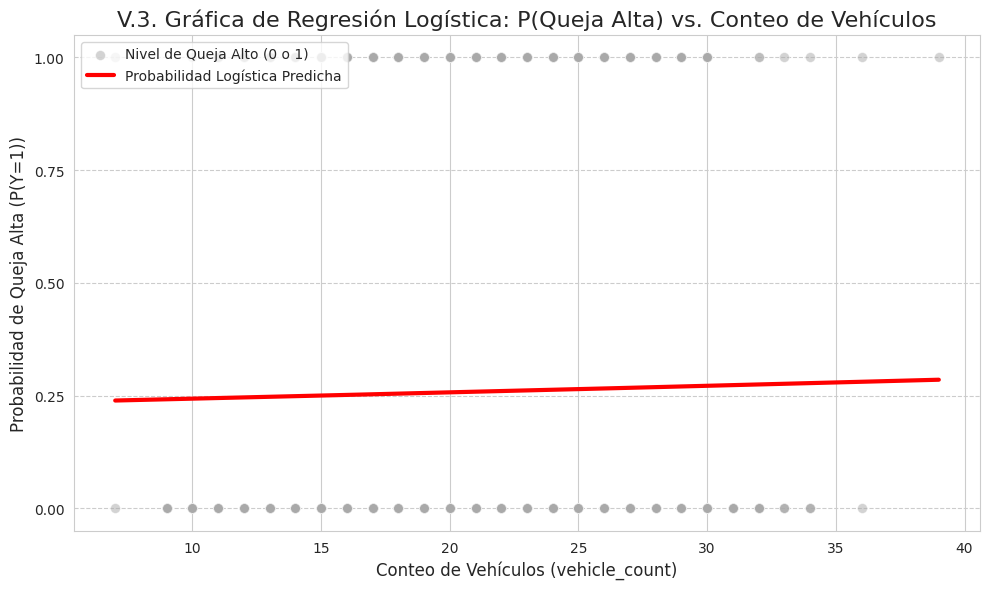

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 1. CARGA DE DATOS (Define 'df')
# Tu URL RAW de GitHub:
github_csv_url = 'https://media.githubusercontent.com/media/pisceno/data_sets/refs/heads/main/urban_noise_levels.csv'

try:
    df = pd.read_csv(github_csv_url)
except Exception as e:
    print(f"Error al cargar el archivo desde GitHub: {e}")
    # Detener la ejecución si el archivo no se carga
    raise

# 2. BINARIACIÓN DE LA VARIABLE DEPENDIENTE (Define 'Y_binary')
# Se transforma la variable ordinal 'noise_complaints' a binaria 'high_complaint'
# 1 (Éxito) si queja >= 2, 0 (Fracaso) si queja < 2.
df['high_complaint'] = (df['noise_complaints'] >= 2).astype(int)
Y_binary = df['high_complaint']

# 3. ENTRENAMIENTO del Modelo Simple (Usa la variable más significativa: 'vehicle_count')
X_graph = df['vehicle_count']
X_graph_const = sm.add_constant(X_graph)

# Entrenar el modelo logístico
modelo_logistico_simple = sm.Logit(Y_binary, X_graph_const).fit(disp=0)

# 4. PREDICCIÓN para la Curva Sigmoide
# Creamos un rango de valores de 'vehicle_count' para suavizar la curva
X_rango = np.linspace(df['vehicle_count'].min(), df['vehicle_count'].max(), 300)
X_rango_const = sm.add_constant(X_rango, prepend=True)

# Predecir las probabilidades de Y=1 (high_complaint=1)
probabilidades_predichas = modelo_logistico_simple.predict(X_rango_const)

print("✅ Modelo simple entrenado y predicciones calculadas. Generando gráfica...")

# 5. GENERACIÓN DE LA GRÁFICA (V.3)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# a) Diagrama de Dispersión (Puntos de Datos Brutos)
sns.scatterplot(x=df['vehicle_count'], y=Y_binary, color='darkgray', alpha=0.5,
                label='Nivel de Queja Alto (0 o 1)', s=50)

# b) Curva Logística (Línea Sigmoide)
plt.plot(X_rango, probabilidades_predichas, color='red', linewidth=3,
         label='Probabilidad Logística Predicha')

# Configuración y etiquetas
plt.title('V.3. Gráfica de Regresión Logística: P(Queja Alta) vs. Conteo de Vehículos', fontsize=16)
plt.xlabel('Conteo de Vehículos (vehicle_count)', fontsize=12)
plt.ylabel('Probabilidad de Queja Alta (P(Y=1))', fontsize=12)
plt.legend(loc='upper left')
plt.yticks([0, 0.25, 0.50, 0.75, 1.0])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()